Kelas : S1-IF-10-05

Oleh :

Kyla Azzahra Kinan 		2211102225

Hendrik Prayoga 			2211102161

Riftian Dimas Adriano 		2211102138

Muhammad Hatta Rajasa		2211102153

Arif Pramudia Wardana 		2211102149


In [ ]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi data

# Membaca file CSV dan menyimpannya dalam DataFrame
data = pd.read_csv('10_DataBarang.csv')  # Menggunakan fungsi read_csv untuk membaca file '10_DataBarang.csv'

In [ ]:
data.head() # Menampilkan 5 baris pertama dari DataFrame

,id_barang,berat,nilai_barang
0,BRG00001,17.26,109753
1,BRG00002,13.21,99982
2,BRG00003,8.57,437287
3,BRG00004,15.99,343799
4,BRG00005,10.26,324152


# n = 10 data

In [ ]:
import pandas as pd
import time
import heapq
from typing import List, Tuple

# Load data dari file CSV
file_path = '10_DataBarang.csv'
data_barang = pd.read_csv(file_path)

# Menyusun item dari data menjadi list of tuples (id_barang, berat, nilai_barang)
items = list(zip(data_barang['id_barang'], data_barang['berat'], data_barang['nilai_barang']))
capacity = 5000  # Kapasitas maksimum knapsack

# Fungsi untuk menampilkan hasil
def knapsack_result(selected_items: List[str], total_weight: float, total_value: int, runtime: float):
    return {
        "selected_items": selected_items,
        "total_weight": total_weight,
        "total_value": total_value,
        "runtime": runtime
    }

# 1. Dynamic Programming
def knapsack_dp(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [int(item[1]) for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Tabel DP untuk menyimpan nilai maksimum

    # Mengisi tabel DP
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:  # Jika item dapat dimasukkan
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]  # Item tidak dimasukkan

    # Menelusuri barang yang diambil
    w = W
    selected_items = []
    total_weight = 0  # Inisialisasi total_weight
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Jika item diambil
            selected_items.append(items[i - 1][0])  # Tambahkan id_barang ke selected_items
            total_weight += weights[i - 1]  # Akumulasi bobot
            w -= weights[i - 1]  # Kurangi kapasitas

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_value = dp[n][W]  # Nilai maksimum
    return knapsack_result(selected_items, total_weight, total_value, runtime)

# 2. Branch and Bound
class Node:
    def __init__(self, level, value, weight, bound, selected):
        self.level = level  # Level dalam pohon keputusan
        self.value = value  # Nilai total
        self.weight = weight  # Bobot total
        self.bound = bound  # Batas nilai maksimum
        self.selected = selected  # Item yang dipilih

    def __lt__(self, other):
        return self.bound > other.bound  # Max heap berdasarkan bound

# Fungsi untuk menghitung bound
def bound(node, n, W, weights, values):
    if node.weight >= W:  # Jika bobot melebihi kapasitas
        return 0
    profit_bound = node.value  # Inisialisasi profit_bound
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + weights[j] <= W:  # Tambahkan item ke bound
        total_weight += weights[j]
        profit_bound += values[j]
        j += 1
    if j < n:  # Jika masih ada item yang tersisa
        profit_bound += (W - total_weight) * values[j] / weights[j]  # Tambahkan nilai proporsional
    return profit_bound

def knapsack_branch_and_bound(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [item[1] for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    items_sorted = sorted(enumerate(items), key=lambda x: x[1][2] / x[1][1], reverse=True)  # Urutkan item berdasarkan rasio nilai terhadap bobot
    weights = [items_sorted[i][1][1] for i in range(n)]  # Bobot item yang sudah diurutkan
    values = [items_sorted[i][1][2] for i in range(n)]  # Nilai item yang sudah diurutkan
    ids = [items_sorted[i][1][0] for i in range(n)]  # ID item yang sudah diurutkan

    queue = []  # Antrian untuk menyimpan node
    u = Node(-1, 0, 0, 0.0, [])  # Node awal
    u.bound = bound(u, n, W, weights, values)  # Hitung bound untuk node awal
    max_profit = 0  # Inisialisasi profit maksimum
    best_items = []  # Inisialisasi item terbaik

    heapq.heappush(queue, u)  # Masukkan node awal ke dalam antrian
    while queue:  # Selama antrian tidak kosong
        u = heapq.heappop(queue)  # Ambil node dengan bound tertinggi
        if u.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
            v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru
            if v.level < n:  # Jika masih ada item yang tersisa
                v.weight = u.weight + weights[v.level]  # Tambahkan bobot item
                v.value = u.value + values[v.level]  # Tambahkan nilai item
                v.selected = u.selected + [ids[v.level]]  # Tambahkan ID item ke yang dipilih
                if v.weight <= W and v.value > max_profit:  # Jika bobot tidak melebihi kapasitas
                    max_profit = v.value  # Update profit maksimum
                    best_items = v.selected  # Update item terbaik
                v.bound = bound(v, n, W, weights, values)  # Hitung bound untuk node baru
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian
                v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru untuk tidak mengambil item
                v.bound = bound(v, n, W, weights, values)  # Hitung bound
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_weight = sum(items[int(item[3:]) - 1][1] for item in best_items)  # Hitung total bobot item terbaik
    return knapsack_result(best_items, total_weight, max_profit, runtime)  # Kembalikan hasil

# 3. Greedy
def knapsack_greedy(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    W = capacity  # Kapasitas knapsack
    items_sorted = sorted(items, key=lambda x: x[2] / x[1], reverse=True)  # Urutkan berdasarkan rasio nilai terhadap bobot

    total_weight = 0  # Inisialisasi total bobot
    total_value = 0  # Inisialisasi total nilai
    selected_items = []  # Inisialisasi item yang dipilih

    for item in items_sorted:  # Iterasi melalui item yang sudah diurutkan
        if total_weight + item[1] <= W:  # Jika item dapat dimasukkan
            selected_items.append(item[0])  # Tambahkan ID item ke yang dipilih
            total_weight += item[1]  # Akumulasi bobot
            total_value += item[2]  # Akumulasi nilai

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    return knapsack_result(selected_items, total_weight, total_value, runtime)  # Kembalikan hasil

# Menjalankan algoritma
result_dp = knapsack_dp(items, capacity)  # Hasil dari Dynamic Programming
result_bb = knapsack_branch_and_bound(items, capacity)  # Hasil dari Branch and Bound
result_greedy = knapsack_greedy(items, capacity)  # Hasil dari Greedy

def format_result(result):
    formatted = f"Selected Items: {', '.join(result['selected_items'])}\n"  # Format item yang dipilih
    formatted += f"Total Weight: {result['total_weight']}\n"  # Format total bobot
    formatted += f"Total Value: {result['total_value']}\n"  # Format total nilai
    formatted += f"Runtime: {result['runtime']:.6f} seconds\n"  # Format waktu eksekusi
    return formatted

# Menampilkan hasil
print("Ukuran input 10 data")  # Menampilkan ukuran input
print("Kapasitas bobot max : 5000 kg\n")  # Menampilkan kapasitas maksimum
print("Dynamic Programming:\n" + format_result(result_dp))  # Menampilkan hasil Dynamic Programming
print("\nBranch and Bound:\n" + format_result(result_bb))  # Menampilkan hasil Branch and Bound
print("\nGreedy:\n" + format_result(result_greedy))  # Menampilkan hasil Greedy

Ukuran input 10 data
Kapasitas bobot max : 5000 kg

Dynamic Programming:
Selected Items: BRG00010, BRG00009, BRG00008, BRG00007, BRG00006, BRG00005, BRG00004, BRG00003, BRG00002, BRG00001
Total Weight: 109
Total Value: 2631875
Runtime: 0.025598 seconds


Branch and Bound:
Selected Items: BRG00006, BRG00008, BRG00003, BRG00005, BRG00009, BRG00004, BRG00007, BRG00010, BRG00002, BRG00001
Total Weight: 112.94000000000001
Total Value: 2631875
Runtime: 0.000125 seconds


Greedy:
Selected Items: BRG00006, BRG00008, BRG00003, BRG00005, BRG00009, BRG00004, BRG00007, BRG00010, BRG00002, BRG00001
Total Weight: 112.94000000000001
Total Value: 2631875
Runtime: 0.000009 seconds



# n = 100 data

In [ ]:
import pandas as pd
import time
import heapq
from typing import List, Tuple

# Load data dari file CSV
file_path = '100_DataBarang.csv'
data_barang = pd.read_csv(file_path)

# Menyusun item dari data menjadi list of tuples (id_barang, berat, nilai_barang)
items = list(zip(data_barang['id_barang'], data_barang['berat'], data_barang['nilai_barang']))
capacity = 5000  # Kapasitas maksimum knapsack

# Fungsi untuk menampilkan hasil
def knapsack_result(selected_items: List[str], total_weight: float, total_value: int, runtime: float):
    return {
        "selected_items": selected_items,
        "total_weight": total_weight,
        "total_value": total_value,
        "runtime": runtime
    }

# 1. Dynamic Programming
def knapsack_dp(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [int(item[1]) for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Tabel DP untuk menyimpan nilai maksimum

    # Mengisi tabel DP
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:  # Jika item dapat dimasukkan
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]  # Item tidak dimasukkan

    # Menelusuri barang yang diambil
    w = W
    selected_items = []
    total_weight = 0  # Inisialisasi total_weight
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Jika item diambil
            selected_items.append(items[i - 1][0])  # Tambahkan id_barang ke selected_items
            total_weight += weights[i - 1]  # Akumulasi bobot
            w -= weights[i - 1]  # Kurangi kapasitas

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_value = dp[n][W]  # Nilai maksimum
    return knapsack_result(selected_items, total_weight, total_value, runtime)

# 2. Branch and Bound
class Node:
    def __init__(self, level, value, weight, bound, selected):
        self.level = level  # Level dalam pohon keputusan
        self.value = value  # Nilai total
        self.weight = weight  # Bobot total
        self.bound = bound  # Batas nilai maksimum
        self.selected = selected  # Item yang dipilih

    def __lt__(self, other):
        return self.bound > other.bound  # Max heap berdasarkan bound

# Fungsi untuk menghitung bound
def bound(node, n, W, weights, values):
    if node.weight >= W:  # Jika bobot melebihi kapasitas
        return 0
    profit_bound = node.value  # Inisialisasi profit_bound
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + weights[j] <= W:  # Tambahkan item ke bound
        total_weight += weights[j]
        profit_bound += values[j]
        j += 1
    if j < n:  # Jika masih ada item yang tersisa
        profit_bound += (W - total_weight) * values[j] / weights[j]  # Tambahkan nilai proporsional
    return profit_bound

def knapsack_branch_and_bound(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [item[1] for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    items_sorted = sorted(enumerate(items), key=lambda x: x[1][2] / x[1][1], reverse=True)  # Urutkan item berdasarkan rasio nilai terhadap bobot
    weights = [items_sorted[i][1][1] for i in range(n)]  # Bobot item yang sudah diurutkan
    values = [items_sorted[i][1][2] for i in range(n)]  # Nilai item yang sudah diurutkan
    ids = [items_sorted[i][1][0] for i in range(n)]  # ID item yang sudah diurutkan

    queue = []  # Antrian untuk menyimpan node
    u = Node(-1, 0, 0, 0.0, [])  # Node awal
    u.bound = bound(u, n, W, weights, values)  # Hitung bound untuk node awal
    max_profit = 0  # Inisialisasi profit maksimum
    best_items = []  # Inisialisasi item terbaik

    heapq.heappush(queue, u)  # Masukkan node awal ke dalam antrian
    while queue:  # Selama antrian tidak kosong
        u = heapq.heappop(queue)  # Ambil node dengan bound tertinggi
        if u.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
            v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru
            if v.level < n:  # Jika masih ada item yang tersisa
                v.weight = u.weight + weights[v.level]  # Tambahkan bobot item
                v.value = u.value + values[v.level]  # Tambahkan nilai item
                v.selected = u.selected + [ids[v.level]]  # Tambahkan ID item ke yang dipilih
                if v.weight <= W and v.value > max_profit:  # Jika bobot tidak melebihi kapasitas
                    max_profit = v.value  # Update profit maksimum
                    best_items = v.selected  # Update item terbaik
                v.bound = bound(v, n, W, weights, values)  # Hitung bound untuk node baru
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian
                v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru untuk tidak mengambil item
                v.bound = bound(v, n, W, weights, values)  # Hitung bound
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_weight = sum(items[int(item[3:]) - 1][1] for item in best_items)  # Hitung total bobot item terbaik
    return knapsack_result(best_items, total_weight, max_profit, runtime)  # Kembalikan hasil

# 3. Greedy
def knapsack_greedy(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    W = capacity  # Kapasitas knapsack
    items_sorted = sorted(items, key=lambda x: x[2] / x[1], reverse=True)  # Urutkan berdasarkan rasio nilai terhadap bobot

    total_weight = 0  # Inisialisasi total bobot
    total_value = 0  # Inisialisasi total nilai
    selected_items = []  # Inisialisasi item yang dipilih

    for item in items_sorted:  # Iterasi melalui item yang sudah diurutkan
        if total_weight + item[1] <= W:  # Jika item dapat dimasukkan
            selected_items.append(item[0])  # Tambahkan ID item ke yang dipilih
            total_weight += item[1]  # Akumulasi bobot
            total_value += item[2]  # Akumulasi nilai

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    return knapsack_result(selected_items, total_weight, total_value, runtime)  # Kembalikan hasil

# Menjalankan algoritma
result_dp = knapsack_dp(items, capacity)  # Hasil dari Dynamic Programming
result_bb = knapsack_branch_and_bound(items, capacity)  # Hasil dari Branch and Bound
result_greedy = knapsack_greedy(items, capacity)  # Hasil dari Greedy

def format_result(result):
    formatted = f"Selected Items: {', '.join(result['selected_items'])}\n"  # Format item yang dipilih
    formatted += f"Total Weight: {result['total_weight']}\n"  # Format total bobot
    formatted += f"Total Value: {result['total_value']}\n"  # Format total nilai
    formatted += f"Runtime: {result['runtime']:.6f} seconds\n"  # Format waktu eksekusi
    return formatted

# Menampilkan hasil
print("Ukuran input 100 data")  # Menampilkan ukuran input
print("Kapasitas bobot max : 5000 kg\n")  # Menampilkan kapasitas maksimum
print("Dynamic Programming:\n" + format_result(result_dp))  # Menampilkan hasil Dynamic Programming
print("\nBranch and Bound:\n" + format_result(result_bb))  # Menampilkan hasil Branch and Bound
print("\nGreedy:\n" + format_result(result_greedy))  # Menampilkan hasil Greedy

Ukuran input 100 data
Kapasitas bobot max : 5000 kg

Dynamic Programming:
Selected Items: BRG00100, BRG00099, BRG00098, BRG00097, BRG00096, BRG00095, BRG00094, BRG00093, BRG00092, BRG00091, BRG00090, BRG00089, BRG00088, BRG00087, BRG00086, BRG00085, BRG00084, BRG00083, BRG00082, BRG00081, BRG00080, BRG00079, BRG00078, BRG00077, BRG00076, BRG00075, BRG00074, BRG00073, BRG00072, BRG00071, BRG00070, BRG00069, BRG00068, BRG00067, BRG00066, BRG00065, BRG00064, BRG00063, BRG00062, BRG00061, BRG00060, BRG00059, BRG00058, BRG00057, BRG00056, BRG00055, BRG00054, BRG00053, BRG00052, BRG00051, BRG00050, BRG00049, BRG00048, BRG00047, BRG00046, BRG00045, BRG00044, BRG00043, BRG00042, BRG00041, BRG00040, BRG00039, BRG00038, BRG00037, BRG00036, BRG00035, BRG00034, BRG00033, BRG00032, BRG00031, BRG00030, BRG00029, BRG00028, BRG00027, BRG00026, BRG00025, BRG00024, BRG00023, BRG00022, BRG00021, BRG00020, BRG00019, BRG00018, BRG00017, BRG00016, BRG00015, BRG00014, BRG00013, BRG00012, BRG00011, BRG00010, 

# n = 1000 data

In [ ]:
import pandas as pd
import time
import heapq
from typing import List, Tuple

# Load data dari file CSV
file_path = '1000_DataBarang.csv'
data_barang = pd.read_csv(file_path)

# Menyusun item dari data menjadi list of tuples (id_barang, berat, nilai_barang)
items = list(zip(data_barang['id_barang'], data_barang['berat'], data_barang['nilai_barang']))
capacity = 5000  # Kapasitas maksimum knapsack

# Fungsi untuk menampilkan hasil
def knapsack_result(selected_items: List[str], total_weight: float, total_value: int, runtime: float):
    return {
        "selected_items": selected_items,
        "total_weight": total_weight,
        "total_value": total_value,
        "runtime": runtime
    }

# 1. Dynamic Programming
def knapsack_dp(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [int(item[1]) for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Tabel DP untuk menyimpan nilai maksimum

    # Mengisi tabel DP
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:  # Jika item dapat dimasukkan
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]  # Item tidak dimasukkan

    # Menelusuri barang yang diambil
    w = W
    selected_items = []
    total_weight = 0  # Inisialisasi total_weight
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Jika item diambil
            selected_items.append(items[i - 1][0])  # Tambahkan id_barang ke selected_items
            total_weight += weights[i - 1]  # Akumulasi bobot
            w -= weights[i - 1]  # Kurangi kapasitas

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_value = dp[n][W]  # Nilai maksimum
    return knapsack_result(selected_items, total_weight, total_value, runtime)

# 2. Branch and Bound
class Node:
    def __init__(self, level, value, weight, bound, selected):
        self.level = level  # Level dalam pohon keputusan
        self.value = value  # Nilai total
        self.weight = weight  # Bobot total
        self.bound = bound  # Batas nilai maksimum
        self.selected = selected  # Item yang dipilih

    def __lt__(self, other):
        return self.bound > other.bound  # Max heap berdasarkan bound

# Fungsi untuk menghitung bound
def bound(node, n, W, weights, values):
    if node.weight >= W:  # Jika bobot melebihi kapasitas
        return 0
    profit_bound = node.value  # Inisialisasi profit_bound
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + weights[j] <= W:  # Tambahkan item ke bound
        total_weight += weights[j]
        profit_bound += values[j]
        j += 1
    if j < n:  # Jika masih ada item yang tersisa
        profit_bound += (W - total_weight) * values[j] / weights[j]  # Tambahkan nilai proporsional
    return profit_bound

def knapsack_branch_and_bound(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [item[1] for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    items_sorted = sorted(enumerate(items), key=lambda x: x[1][2] / x[1][1], reverse=True)  # Urutkan item berdasarkan rasio nilai terhadap bobot
    weights = [items_sorted[i][1][1] for i in range(n)]  # Bobot item yang sudah diurutkan
    values = [items_sorted[i][1][2] for i in range(n)]  # Nilai item yang sudah diurutkan
    ids = [items_sorted[i][1][0] for i in range(n)]  # ID item yang sudah diurutkan

    queue = []  # Antrian untuk menyimpan node
    u = Node(-1, 0, 0, 0.0, [])  # Node awal
    u.bound = bound(u, n, W, weights, values)  # Hitung bound untuk node awal
    max_profit = 0  # Inisialisasi profit maksimum
    best_items = []  # Inisialisasi item terbaik

    heapq.heappush(queue, u)  # Masukkan node awal ke dalam antrian
    while queue:  # Selama antrian tidak kosong
        u = heapq.heappop(queue)  # Ambil node dengan bound tertinggi
        if u.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
            v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru
            if v.level < n:  # Jika masih ada item yang tersisa
                v.weight = u.weight + weights[v.level]  # Tambahkan bobot item
                v.value = u.value + values[v.level]  # Tambahkan nilai item
                v.selected = u.selected + [ids[v.level]]  # Tambahkan ID item ke yang dipilih
                if v.weight <= W and v.value > max_profit:  # Jika bobot tidak melebihi kapasitas
                    max_profit = v.value  # Update profit maksimum
                    best_items = v.selected  # Update item terbaik
                v.bound = bound(v, n, W, weights, values)  # Hitung bound untuk node baru
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian
                v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru untuk tidak mengambil item
                v.bound = bound(v, n, W, weights, values)  # Hitung bound
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_weight = sum(items[int(item[3:]) - 1][1] for item in best_items)  # Hitung total bobot item terbaik
    return knapsack_result(best_items, total_weight, max_profit, runtime)  # Kembalikan hasil

# 3. Greedy
def knapsack_greedy(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    W = capacity  # Kapasitas knapsack
    items_sorted = sorted(items, key=lambda x: x[2] / x[1], reverse=True)  # Urutkan berdasarkan rasio nilai terhadap bobot

    total_weight = 0  # Inisialisasi total bobot
    total_value = 0  # Inisialisasi total nilai
    selected_items = []  # Inisialisasi item yang dipilih

    for item in items_sorted:  # Iterasi melalui item yang sudah diurutkan
        if total_weight + item[1] <= W:  # Jika item dapat dimasukkan
            selected_items.append(item[0])  # Tambahkan ID item ke yang dipilih
            total_weight += item[1]  # Akumulasi bobot
            total_value += item[2]  # Akumulasi nilai

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    return knapsack_result(selected_items, total_weight, total_value, runtime)  # Kembalikan hasil

# Menjalankan algoritma
result_dp = knapsack_dp(items, capacity)  # Hasil dari Dynamic Programming
result_bb = knapsack_branch_and_bound(items, capacity)  # Hasil dari Branch and Bound
result_greedy = knapsack_greedy(items, capacity)  # Hasil dari Greedy

def format_result(result):
    formatted = f"Selected Items: {', '.join(result['selected_items'])}\n"  # Format item yang dipilih
    formatted += f"Total Weight: {result['total_weight']}\n"  # Format total bobot
    formatted += f"Total Value: {result['total_value']}\n"  # Format total nilai
    formatted += f"Runtime: {result['runtime']:.6f} seconds\n"  # Format waktu eksekusi
    return formatted

# Menampilkan hasil
print("Ukuran input 1000 data")  # Menampilkan ukuran input
print("Kapasitas bobot max : 5000 kg\n")  # Menampilkan kapasitas maksimum
print("Dynamic Programming:\n" + format_result(result_dp))  # Menampilkan hasil Dynamic Programming
print("\nBranch and Bound:\n" + format_result(result_bb))  # Menampilkan hasil Branch and Bound
print("\nGreedy:\n" + format_result(result_greedy))  # Menampilkan hasil Greedy

Ukuran input 1000 data
Kapasitas bobot max : 5000 kg

Dynamic Programming:
Selected Items: BRG01000, BRG00999, BRG00998, BRG00997, BRG00996, BRG00994, BRG00992, BRG00990, BRG00989, BRG00988, BRG00987, BRG00984, BRG00983, BRG00982, BRG00981, BRG00977, BRG00976, BRG00973, BRG00972, BRG00971, BRG00970, BRG00969, BRG00967, BRG00966, BRG00965, BRG00964, BRG00963, BRG00962, BRG00961, BRG00960, BRG00959, BRG00958, BRG00957, BRG00955, BRG00953, BRG00952, BRG00951, BRG00950, BRG00949, BRG00948, BRG00945, BRG00940, BRG00938, BRG00937, BRG00936, BRG00934, BRG00933, BRG00932, BRG00930, BRG00928, BRG00927, BRG00926, BRG00925, BRG00921, BRG00919, BRG00917, BRG00916, BRG00915, BRG00914, BRG00913, BRG00912, BRG00910, BRG00907, BRG00906, BRG00905, BRG00904, BRG00903, BRG00902, BRG00901, BRG00900, BRG00899, BRG00898, BRG00897, BRG00896, BRG00893, BRG00892, BRG00889, BRG00888, BRG00884, BRG00880, BRG00878, BRG00876, BRG00874, BRG00873, BRG00871, BRG00867, BRG00866, BRG00865, BRG00864, BRG00863, BRG00861,

# n = 5000 data

In [ ]:
import pandas as pd
import time
import heapq
from typing import List, Tuple

# Load data dari file CSV
file_path = '5000_DataBarang.csv'
data_barang = pd.read_csv(file_path)

# Menyusun item dari data menjadi list of tuples (id_barang, berat, nilai_barang)
items = list(zip(data_barang['id_barang'], data_barang['berat'], data_barang['nilai_barang']))
capacity = 5000  # Kapasitas maksimum knapsack

# Fungsi untuk menampilkan hasil
def knapsack_result(selected_items: List[str], total_weight: float, total_value: int, runtime: float):
    return {
        "selected_items": selected_items,
        "total_weight": total_weight,
        "total_value": total_value,
        "runtime": runtime
    }

# 1. Dynamic Programming
def knapsack_dp(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [int(item[1]) for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Tabel DP untuk menyimpan nilai maksimum

    # Mengisi tabel DP
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:  # Jika item dapat dimasukkan
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]  # Item tidak dimasukkan

    # Menelusuri barang yang diambil
    w = W
    selected_items = []
    total_weight = 0  # Inisialisasi total_weight
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Jika item diambil
            selected_items.append(items[i - 1][0])  # Tambahkan id_barang ke selected_items
            total_weight += weights[i - 1]  # Akumulasi bobot
            w -= weights[i - 1]  # Kurangi kapasitas

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_value = dp[n][W]  # Nilai maksimum
    return knapsack_result(selected_items, total_weight, total_value, runtime)

# 2. Branch and Bound
class Node:
    def __init__(self, level, value, weight, bound, selected):
        self.level = level  # Level dalam pohon keputusan
        self.value = value  # Nilai total
        self.weight = weight  # Bobot total
        self.bound = bound  # Batas nilai maksimum
        self.selected = selected  # Item yang dipilih

    def __lt__(self, other):
        return self.bound > other.bound  # Max heap berdasarkan bound

# Fungsi untuk menghitung bound
def bound(node, n, W, weights, values):
    if node.weight >= W:  # Jika bobot melebihi kapasitas
        return 0
    profit_bound = node.value  # Inisialisasi profit_bound
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + weights[j] <= W:  # Tambahkan item ke bound
        total_weight += weights[j]
        profit_bound += values[j]
        j += 1
    if j < n:  # Jika masih ada item yang tersisa
        profit_bound += (W - total_weight) * values[j] / weights[j]  # Tambahkan nilai proporsional
    return profit_bound

def knapsack_branch_and_bound(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [item[1] for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    items_sorted = sorted(enumerate(items), key=lambda x: x[1][2] / x[1][1], reverse=True)  # Urutkan item berdasarkan rasio nilai terhadap bobot
    weights = [items_sorted[i][1][1] for i in range(n)]  # Bobot item yang sudah diurutkan
    values = [items_sorted[i][1][2] for i in range(n)]  # Nilai item yang sudah diurutkan
    ids = [items_sorted[i][1][0] for i in range(n)]  # ID item yang sudah diurutkan

    queue = []  # Antrian untuk menyimpan node
    u = Node(-1, 0, 0, 0.0, [])  # Node awal
    u.bound = bound(u, n, W, weights, values)  # Hitung bound untuk node awal
    max_profit = 0  # Inisialisasi profit maksimum
    best_items = []  # Inisialisasi item terbaik

    heapq.heappush(queue, u)  # Masukkan node awal ke dalam antrian
    while queue:  # Selama antrian tidak kosong
        u = heapq.heappop(queue)  # Ambil node dengan bound tertinggi
        if u.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
            v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru
            if v.level < n:  # Jika masih ada item yang tersisa
                v.weight = u.weight + weights[v.level]  # Tambahkan bobot item
                v.value = u.value + values[v.level]  # Tambahkan nilai item
                v.selected = u.selected + [ids[v.level]]  # Tambahkan ID item ke yang dipilih
                if v.weight <= W and v.value > max_profit:  # Jika bobot tidak melebihi kapasitas
                    max_profit = v.value  # Update profit maksimum
                    best_items = v.selected  # Update item terbaik
                v.bound = bound(v, n, W, weights, values)  # Hitung bound untuk node baru
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian
                v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru untuk tidak mengambil item
                v.bound = bound(v, n, W, weights, values)  # Hitung bound
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_weight = sum(items[int(item[3:]) - 1][1] for item in best_items)  # Hitung total bobot item terbaik
    return knapsack_result(best_items, total_weight, max_profit, runtime)  # Kembalikan hasil

# 3. Greedy
def knapsack_greedy(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    W = capacity  # Kapasitas knapsack
    items_sorted = sorted(items, key=lambda x: x[2] / x[1], reverse=True)  # Urutkan berdasarkan rasio nilai terhadap bobot

    total_weight = 0  # Inisialisasi total bobot
    total_value = 0  # Inisialisasi total nilai
    selected_items = []  # Inisialisasi item yang dipilih

    for item in items_sorted:  # Iterasi melalui item yang sudah diurutkan
        if total_weight + item[1] <= W:  # Jika item dapat dimasukkan
            selected_items.append(item[0])  # Tambahkan ID item ke yang dipilih
            total_weight += item[1]  # Akumulasi bobot
            total_value += item[2]  # Akumulasi nilai

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    return knapsack_result(selected_items, total_weight, total_value, runtime)  # Kembalikan hasil

# Menjalankan algoritma
result_dp = knapsack_dp(items, capacity)  # Hasil dari Dynamic Programming
result_bb = knapsack_branch_and_bound(items, capacity)  # Hasil dari Branch and Bound
result_greedy = knapsack_greedy(items, capacity)  # Hasil dari Greedy

def format_result(result):
    formatted = f"Selected Items: {', '.join(result['selected_items'])}\n"  # Format item yang dipilih
    formatted += f"Total Weight: {result['total_weight']}\n"  # Format total bobot
    formatted += f"Total Value: {result['total_value']}\n"  # Format total nilai
    formatted += f"Runtime: {result['runtime']:.6f} seconds\n"  # Format waktu eksekusi
    return formatted

# Menampilkan hasil
print("Ukuran input 5000 data")  # Menampilkan ukuran input
print("Kapasitas bobot max : 5000 kg\n")  # Menampilkan kapasitas maksimum
print("Dynamic Programming:\n" + format_result(result_dp))  # Menampilkan hasil Dynamic Programming
print("\nBranch and Bound:\n" + format_result(result_bb))  # Menampilkan hasil Branch and Bound
print("\nGreedy:\n" + format_result(result_greedy))  # Menampilkan hasil Greedy

Ukuran input 5000 data
Kapasitas bobot max : 5000 kg

Dynamic Programming:
Selected Items: BRG05000, BRG04998, BRG04997, BRG04996, BRG04995, BRG04992, BRG04984, BRG04979, BRG04976, BRG04973, BRG04969, BRG04966, BRG04965, BRG04964, BRG04959, BRG04951, BRG04948, BRG04947, BRG04944, BRG04942, BRG04939, BRG04938, BRG04936, BRG04934, BRG04932, BRG04921, BRG04916, BRG04912, BRG04910, BRG04904, BRG04903, BRG04898, BRG04889, BRG04888, BRG04886, BRG04884, BRG04874, BRG04873, BRG04871, BRG04869, BRG04864, BRG04862, BRG04853, BRG04852, BRG04850, BRG04848, BRG04843, BRG04839, BRG04829, BRG04828, BRG04822, BRG04816, BRG04815, BRG04814, BRG04808, BRG04805, BRG04803, BRG04802, BRG04801, BRG04798, BRG04797, BRG04792, BRG04773, BRG04766, BRG04759, BRG04754, BRG04750, BRG04748, BRG04747, BRG04743, BRG04742, BRG04738, BRG04735, BRG04734, BRG04723, BRG04719, BRG04718, BRG04715, BRG04712, BRG04710, BRG04709, BRG04699, BRG04693, BRG04684, BRG04681, BRG04674, BRG04668, BRG04659, BRG04656, BRG04654, BRG04649,

# n = 10000 data

In [ ]:
import pandas as pd
import time
import heapq
from typing import List, Tuple

# Load data dari file CSV
file_path = '10000_DataBarang.csv'
data_barang = pd.read_csv(file_path)

# Menyusun item dari data menjadi list of tuples (id_barang, berat, nilai_barang)
items = list(zip(data_barang['id_barang'], data_barang['berat'], data_barang['nilai_barang']))
capacity = 5000  # Kapasitas maksimum knapsack

# Fungsi untuk menampilkan hasil
def knapsack_result(selected_items: List[str], total_weight: float, total_value: int, runtime: float):
    return {
        "selected_items": selected_items,
        "total_weight": total_weight,
        "total_value": total_value,
        "runtime": runtime
    }

# 1. Dynamic Programming
def knapsack_dp(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [int(item[1]) for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Tabel DP untuk menyimpan nilai maksimum

    # Mengisi tabel DP
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:  # Jika item dapat dimasukkan
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]  # Item tidak dimasukkan

    # Menelusuri barang yang diambil
    w = W
    selected_items = []
    total_weight = 0  # Inisialisasi total_weight
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Jika item diambil
            selected_items.append(items[i - 1][0])  # Tambahkan id_barang ke selected_items
            total_weight += weights[i - 1]  # Akumulasi bobot
            w -= weights[i - 1]  # Kurangi kapasitas

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_value = dp[n][W]  # Nilai maksimum
    return knapsack_result(selected_items, total_weight, total_value, runtime)

# 2. Branch and Bound
class Node:
    def __init__(self, level, value, weight, bound, selected):
        self.level = level  # Level dalam pohon keputusan
        self.value = value  # Nilai total
        self.weight = weight  # Bobot total
        self.bound = bound  # Batas nilai maksimum
        self.selected = selected  # Item yang dipilih

    def __lt__(self, other):
        return self.bound > other.bound  # Max heap berdasarkan bound

# Fungsi untuk menghitung bound
def bound(node, n, W, weights, values):
    if node.weight >= W:  # Jika bobot melebihi kapasitas
        return 0
    profit_bound = node.value  # Inisialisasi profit_bound
    j = node.level + 1
    total_weight = node.weight
    while j < n and total_weight + weights[j] <= W:  # Tambahkan item ke bound
        total_weight += weights[j]
        profit_bound += values[j]
        j += 1
    if j < n:  # Jika masih ada item yang tersisa
        profit_bound += (W - total_weight) * values[j] / weights[j]  # Tambahkan nilai proporsional
    return profit_bound

def knapsack_branch_and_bound(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    n = len(items)  # Jumlah item
    W = int(capacity)  # Kapasitas knapsack
    weights = [item[1] for item in items]  # List bobot
    values = [item[2] for item in items]  # List nilai
    items_sorted = sorted(enumerate(items), key=lambda x: x[1][2] / x[1][1], reverse=True)  # Urutkan item berdasarkan rasio nilai terhadap bobot
    weights = [items_sorted[i][1][1] for i in range(n)]  # Bobot item yang sudah diurutkan
    values = [items_sorted[i][1][2] for i in range(n)]  # Nilai item yang sudah diurutkan
    ids = [items_sorted[i][1][0] for i in range(n)]  # ID item yang sudah diurutkan

    queue = []  # Antrian untuk menyimpan node
    u = Node(-1, 0, 0, 0.0, [])  # Node awal
    u.bound = bound(u, n, W, weights, values)  # Hitung bound untuk node awal
    max_profit = 0  # Inisialisasi profit maksimum
    best_items = []  # Inisialisasi item terbaik

    heapq.heappush(queue, u)  # Masukkan node awal ke dalam antrian
    while queue:  # Selama antrian tidak kosong
        u = heapq.heappop(queue)  # Ambil node dengan bound tertinggi
        if u.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
            v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru
            if v.level < n:  # Jika masih ada item yang tersisa
                v.weight = u.weight + weights[v.level]  # Tambahkan bobot item
                v.value = u.value + values[v.level]  # Tambahkan nilai item
                v.selected = u.selected + [ids[v.level]]  # Tambahkan ID item ke yang dipilih
                if v.weight <= W and v.value > max_profit:  # Jika bobot tidak melebihi kapasitas
                    max_profit = v.value  # Update profit maksimum
                    best_items = v.selected  # Update item terbaik
                v.bound = bound(v, n, W, weights, values)  # Hitung bound untuk node baru
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian
                v = Node(u.level + 1, u.value, u.weight, 0.0, u.selected[:])  # Buat node baru untuk tidak mengambil item
                v.bound = bound(v, n, W, weights, values)  # Hitung bound
                if v.bound > max_profit:  # Jika bound lebih besar dari profit maksimum
                    heapq.heappush(queue, v)  # Masukkan node baru ke dalam antrian

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    total_weight = sum(items[int(item[3:]) - 1][1] for item in best_items)  # Hitung total bobot item terbaik
    return knapsack_result(best_items, total_weight, max_profit, runtime)  # Kembalikan hasil

# 3. Greedy
def knapsack_greedy(items: List[Tuple[str, float, int]], capacity: float):
    start_time = time.time()  # Mulai pengukuran waktu
    W = capacity  # Kapasitas knapsack
    items_sorted = sorted(items, key=lambda x: x[2] / x[1], reverse=True)  # Urutkan berdasarkan rasio nilai terhadap bobot

    total_weight = 0  # Inisialisasi total bobot
    total_value = 0  # Inisialisasi total nilai
    selected_items = []  # Inisialisasi item yang dipilih

    for item in items_sorted:  # Iterasi melalui item yang sudah diurutkan
        if total_weight + item[1] <= W:  # Jika item dapat dimasukkan
            selected_items.append(item[0])  # Tambahkan ID item ke yang dipilih
            total_weight += item[1]  # Akumulasi bobot
            total_value += item[2]  # Akumulasi nilai

    runtime = time.time() - start_time  # Hitung waktu eksekusi
    return knapsack_result(selected_items, total_weight, total_value, runtime)  # Kembalikan hasil

# Menjalankan algoritma
result_dp = knapsack_dp(items, capacity)  # Hasil dari Dynamic Programming
result_bb = knapsack_branch_and_bound(items, capacity)  # Hasil dari Branch and Bound
result_greedy = knapsack_greedy(items, capacity)  # Hasil dari Greedy

def format_result(result):
    formatted = f"Selected Items: {', '.join(result['selected_items'])}\n"  # Format item yang dipilih
    formatted += f"Total Weight: {result['total_weight']}\n"  # Format total bobot
    formatted += f"Total Value: {result['total_value']}\n"  # Format total nilai
    formatted += f"Runtime: {result['runtime']:.6f} seconds\n"  # Format waktu eksekusi
    return formatted

# Menampilkan hasil
print("Ukuran input 10000 data")  # Menampilkan ukuran input
print("Kapasitas bobot max : 5000 kg\n")  # Menampilkan kapasitas maksimum
print("Dynamic Programming:\n" + format_result(result_dp))  # Menampilkan hasil Dynamic Programming
print("\nBranch and Bound:\n" + format_result(result_bb))  # Menampilkan hasil Branch and Bound
print("\nGreedy:\n" + format_result(result_greedy))  # Menampilkan hasil Greedy

Ukuran input 10000 data
Kapasitas bobot max : 5000 kg

Dynamic Programming:
Selected Items: BRG10000, BRG09999, BRG09998, BRG09994, BRG09993, BRG09991, BRG09985, BRG09983, BRG09979, BRG09969, BRG09963, BRG09962, BRG09959, BRG09935, BRG09922, BRG09913, BRG09908, BRG09902, BRG09895, BRG09891, BRG09889, BRG09888, BRG09887, BRG09886, BRG09883, BRG09881, BRG09880, BRG09878, BRG09870, BRG09867, BRG09856, BRG09846, BRG09839, BRG09833, BRG09828, BRG09822, BRG09821, BRG09819, BRG09818, BRG09815, BRG09808, BRG09807, BRG09799, BRG09796, BRG09792, BRG09788, BRG09786, BRG09785, BRG09784, BRG09781, BRG09776, BRG09773, BRG09772, BRG09765, BRG09752, BRG09748, BRG09746, BRG09744, BRG09741, BRG09730, BRG09724, BRG09723, BRG09717, BRG09710, BRG09698, BRG09696, BRG09695, BRG09688, BRG09682, BRG09680, BRG09675, BRG09674, BRG09673, BRG09667, BRG09664, BRG09654, BRG09653, BRG09652, BRG09648, BRG09645, BRG09641, BRG09638, BRG09634, BRG09630, BRG09629, BRG09628, BRG09627, BRG09616, BRG09615, BRG09613, BRG09610

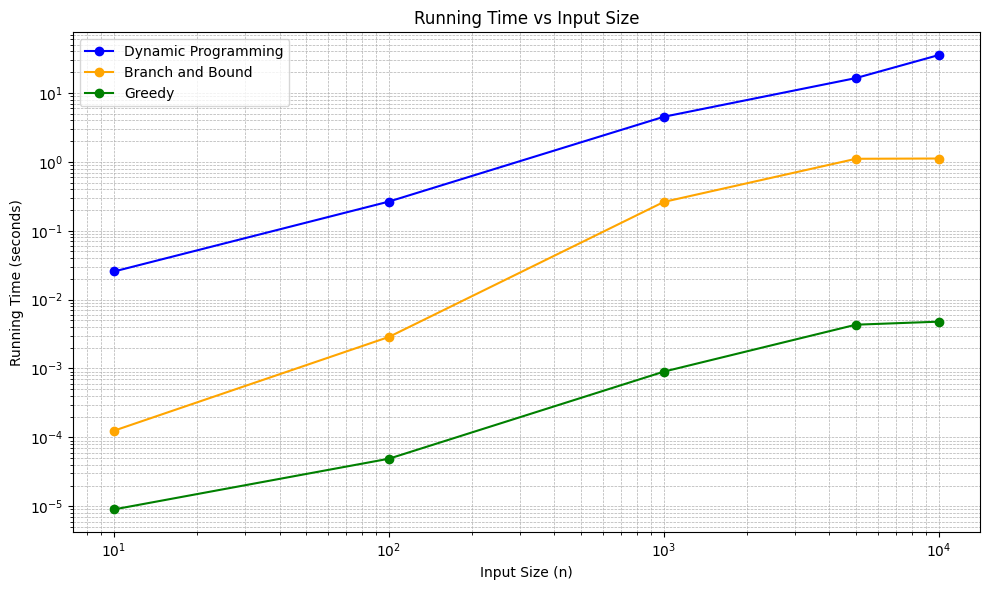

In [ ]:
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk visualisasi data

# Data untuk ukuran input (n) dan waktu eksekusi (t) untuk masing-masing algoritma
input_sizes = [10, 100, 1000, 5000, 10000]  # Ukuran input yang digunakan dalam algoritma

# Waktu eksekusi untuk masing-masing algoritma
dp_times = [0.025598, 0.265003, 4.511589, 16.456330, 35.500866]  # Waktu eksekusi untuk Dynamic Programming
bb_times = [0.000125, 0.002870, 0.261823, 1.107481, 1.117179]      # Waktu eksekusi untuk Branch and Bound
greedy_times = [0.000009, 0.000049, 0.000900, 0.004324, 0.004783] # Waktu eksekusi untuk Greedy

# Membuat grafik
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure grafik

# Plot untuk Dynamic Programming
plt.plot(input_sizes, dp_times, marker='o', label='Dynamic Programming', color='blue')  # Menggambar garis untuk DP

# Plot untuk Branch and Bound
plt.plot(input_sizes, bb_times, marker='o', label='Branch and Bound', color='orange')  # Menggambar garis untuk BB

# Plot untuk Greedy
plt.plot(input_sizes, greedy_times, marker='o', label='Greedy', color='green')  # Menggambar garis untuk Greedy

# Menambahkan judul dan label
plt.title('Running Time vs Input Size')  # Menambahkan judul grafik
plt.xlabel('Input Size (n)')  # Menambahkan label sumbu x
plt.ylabel('Running Time (seconds)')  # Menambahkan label sumbu y
plt.xscale('log')  # Menggunakan skala logaritmik untuk sumbu x agar lebih mudah dibaca
plt.yscale('log')  # Menggunakan skala logaritmik untuk sumbu y agar perbandingan waktu lebih jelas
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Menambahkan grid pada grafik
plt.legend()  # Menampilkan legenda untuk membedakan algoritma
plt.tight_layout()  # Mengatur layout agar lebih rapi

# Menampilkan grafik
plt.show()  # Menampilkan grafik yang telah dibuat

# Kesimpulan

Berdasarkan analisis total nilai, total bobot, dan waktu eksekusi dari setiap algoritma (Dynamic Programming, Branch and Bound, dan Greedy) pada berbagai ukuran input, dapat disimpulkan bahwa:

1. Total Value: Algoritma Dynamic Programming menunjukkan total nilai tertinggi di semua ukuran input, mencapai 705975852 pada ukuran input 10000 data. Sementara itu, algoritma Branch and Bound dan Greedy menghasilkan nilai yang sedikit lebih rendah, dengan nilai maksimum masing-masing 640500242 dan 640484456 pada ukuran input yang sama. Hal ini menunjukkan bahwa Dynamic Programming lebih efektif dalam memaksimalkan nilai total barang yang dapat dimasukkan ke dalam kapasitas maksimum.

2. Total Weight: Dynamic Programming tidak hanya mencapai total nilai tertinggi, tetapi juga total bobot yang paling tepat, yaitu 5000 kg pada ukuran input 1000 data dan seterusnya. Algoritma ini berhasil memanfaatkan kapasitas maksimum dengan efisien. Sementara itu, Branch and Bound dan Greedy juga mencapai total bobot yang mendekati kapasitas maksimum, tetapi Dynamic Programming lebih konsisten dalam mencapai bobot yang tepat.

3. Running Time: Dari segi waktu eksekusi, algoritma Greedy menunjukkan performa tercepat di semua ukuran input, dengan waktu eksekusi yang sangat rendah, bahkan di bawah satu milidetik untuk ukuran input kecil. Branch and Bound juga menunjukkan waktu eksekusi yang efisien, terutama pada ukuran input yang lebih besar, dengan waktu di bawah 3 milidetik untuk ukuran input 1000 data. Sebaliknya, Dynamic Programming, meskipun memberikan hasil terbaik dalam hal nilai total, memiliki waktu eksekusi yang lebih lama, terutama pada ukuran input yang lebih besar, mencapai lebih dari 35 detik untuk 10000 data. Ini menunjukkan bahwa meskipun Dynamic Programming lebih optimal dalam hal nilai, ia memerlukan waktu komputasi yang lebih lama dibandingkan dengan algoritma lainnya.